<a href="https://colab.research.google.com/github/PatkarAditya22/ML-Lab-programs/blob/main/181070045_Aditya_Patkar_decision_tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **ADITYA PATKAR** <br>
181070045 <br>
TY B-TECH COMPS <br>
**Decision tree**

IMPORTS

In [ ]:
import numpy as np 
import pandas as pd
from sklearn.datasets import load_iris
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import random
random.seed(456641)
import re

iris = load_iris()
#load in data
data1 = pd.DataFrame(
    data=iris['data'],
    columns = iris['feature_names']
)

data = load_iris()
data = pd.DataFrame(data= np.c_[data['data'], data['target']],
                     columns= data['feature_names'] + ['target'])
data.tail()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
145,6.7,3.0,5.2,2.3,2.0
146,6.3,2.5,5.0,1.9,2.0
147,6.5,3.0,5.2,2.0,2.0
148,6.2,3.4,5.4,2.3,2.0
149,5.9,3.0,5.1,1.8,2.0


In [ ]:
data.shape

(150, 5)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    float64
dtypes: float64(5)
memory usage: 6.0 KB


**Checking Null**

In [ ]:
data.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
target               0
dtype: int64

**Describing data to have a better look at it**

In [ ]:
data.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


# Exploration
Ploting some graphs..

**BAR PLOT**

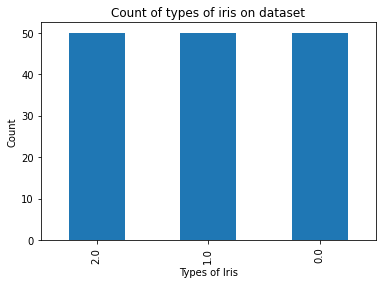

In [ ]:
#Let's see how many examples we have of each target variable (each specie)
data['target'].value_counts().plot(kind='bar')
plt.xlabel('Types of Iris')
plt.ylabel('Count')
plt.title('Count of types of iris on dataset')
plt.show()

**HEATMAP**

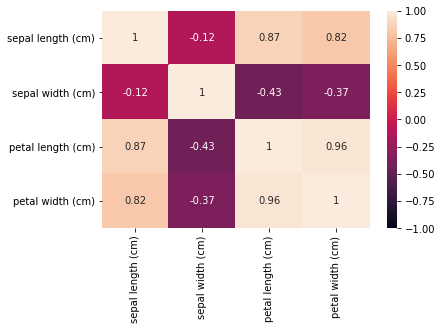

In [ ]:
sns.heatmap(data[['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)' ]].corr(), vmin = -1, vmax=1, annot=True)
plt.show()

**VIOLIN PLOT**

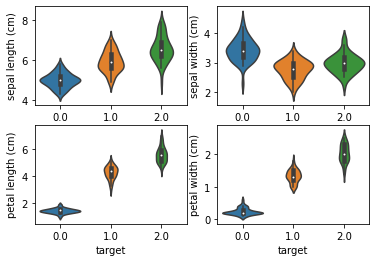

In [ ]:
#Plotting the distributions of examples over each class
plt.subplot(221)
sns.violinplot(x = "target", y = "sepal length (cm)", data=data, size =6)
plt.subplot(222)
sns.violinplot(x = "target", y = "sepal width (cm)", data=data, size = 6)
plt.subplot(223)
sns.violinplot(x = "target", y = "petal length (cm)", data=data, size = 6)
plt.subplot(224)
sns.violinplot(x = "target", y = "petal width (cm)", data=data, size = 6)
plt.show()

**BOX PLOT**

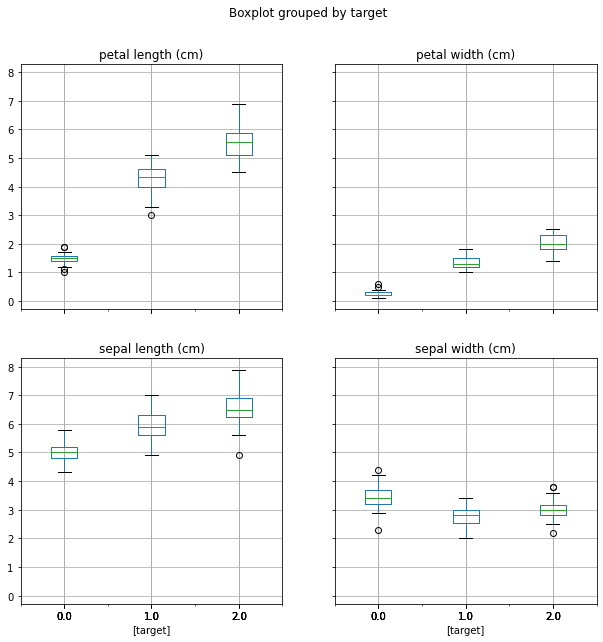

In [ ]:
#Boxplot of variables
data.boxplot(by = "target", figsize = (10, 10))
plt.show()

**PAIRPLOT**

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:1969: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


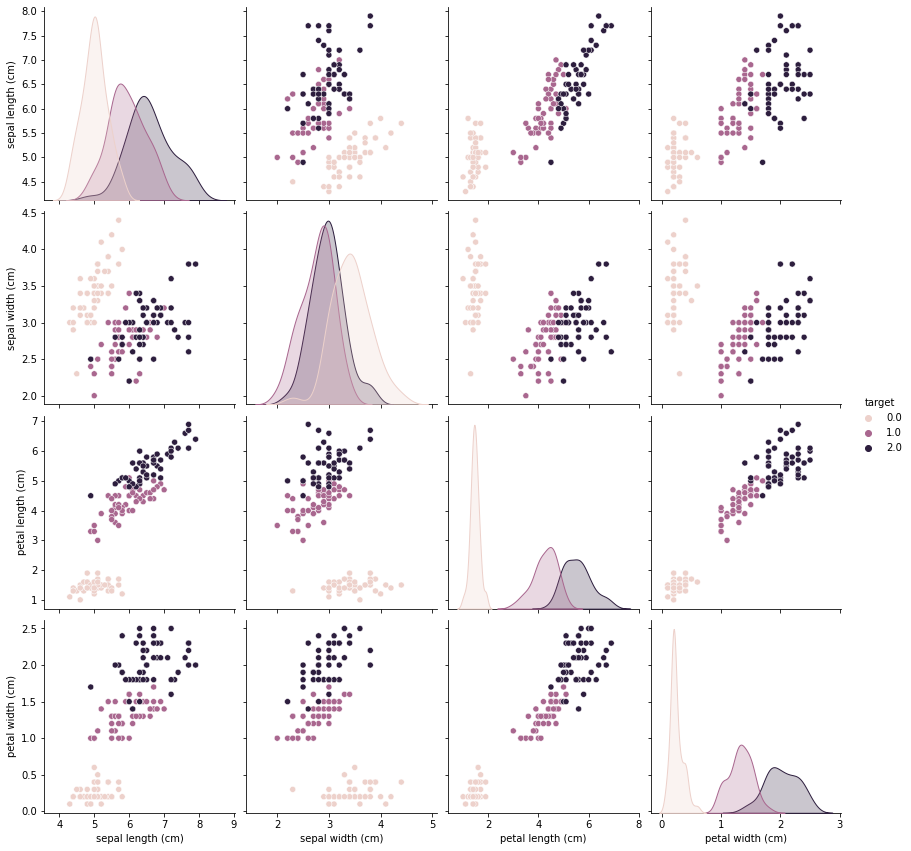

In [ ]:
#Plot relationship between pairwise
sns.pairplot(data, hue="target", size=3)
plt.show()

## **DECISION TREE ALGORITHM**

In [ ]:
#load in target column
target= iris['target']
target_names = iris['target_names']
mapper = dict( (i,target_names[i]) for i in range(3))
#mapp values in target to named classes
target_series = pd.Series([(lambda x:mapper[x])(i) for i in target])
data1['species'] = target_series
data1.head()  

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [ ]:
#check for nulls and nan
data1.isnull().values.any()

False

### **Train and split**

In [ ]:
#split so 80-20 train-test
TEST_AMOUNT= 0.2
DATA_LENGTH = len(data1)
#sample random indices to split

test_indicies = random.sample(range(DATA_LENGTH),int(TEST_AMOUNT * DATA_LENGTH))
test_data = data1.loc[test_indicies]
test_data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
70,5.9,3.2,4.8,1.8,versicolor
46,5.1,3.8,1.6,0.2,setosa
30,4.8,3.1,1.6,0.2,setosa
6,4.6,3.4,1.4,0.3,setosa
91,6.1,3.0,4.6,1.4,versicolor


In [ ]:
#set training data
train_data = pd.concat([data1,test_data]).drop_duplicates(keep=False)
train_data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa


### **Entropy & Information Gain**

In [ ]:
#calculate entropy of samples
def entropy(samples):
    if len(samples) < 2:
        return 0
    
    freq = np.array(samples.value_counts(normalize=True))
    return -(freq * np.log2(freq + 1e-6)).sum()

#calculate information gain
def information_gain (samples,target, attribute):
    values = samples[attribute].value_counts(normalize=True)
    split_entropy = 0
    for v,fr in values.iteritems():
        
        sub_ent = entropy(samples[samples[attribute] == v][target])
        split_entropy += fr * sub_ent
    ent = entropy(samples[target])

    return ent - split_entropy

#given a sorted array, return an array that contains the average of each adjacent number e.g. [1,2,3] -> [1.5,2.5]
def averaged_array(array):
    length = len(array) -1
    mean = lambda x,y: (x+y)/2
    return[mean(array[i],array[i+1]) for i in range(length)]

## **Build Tree Class**

In [ ]:

class tree_node:

    def __init__(self,samples,target):
        self.decsion = None
        self.samples = samples
        self.target = target
        self.split_attribute = None
        self.children = None
        self.parent = None

    def make(self):
        target = self.target
        samples = self.samples
        #if no samples, something has gone very wrong
        if len(samples)  == 0:
            print("?")
            self.decsion = "ya done goffed"
        #if samples are of one kind, make decsion to be of teh sample kind
        elif len(samples[target].unique()) == 1:
            self.decsion = samples[target].unique()[0]
            print(self.decsion)
            return
        #if samples are mixed, then...
        else:

            best_info_gain = 0
            revised_samples = pd.DataFrame()

            #create a data frame that comapres teh values of each column of irsi in boolean form
            # this is teh part that makes things slow
            for attribute in samples.keys():
                if attribute == target:
                    continue  
                #find all unqiue values of teh attribute
                unique_values = samples[attribute].sort_values().unique()
                #avagere array
                unique_values = averaged_array(unique_values)
                for divider in unique_values:
                #check if value is greater than divider value and make nwew columnregarding this
                    name = attribute +" > " + str(divider)
                    revised_samples[name] = samples[attribute] >  divider

            revised_samples[target] = samples[target]

            # then from this revised df just pick out columns with bets information gain
            for attribute in revised_samples.keys():
                if attribute == target:
                    continue               
                
                info_gain = information_gain(revised_samples,target,attribute)
                #print("Information Gain at {}: {:.2f}".format(attribute,info_gain))
                if info_gain > best_info_gain:
                    best_info_gain = info_gain
                    self.split_attribute = attribute
            #print("Spliting by: {} Info Gain: {:.2f}".format(self.split_attribute,best_info_gain))

            self.children = {}
            #then set value and make the child nodes
            for value in revised_samples[self.split_attribute].unique():
                index = revised_samples[self.split_attribute] == value
                
                print((self.split_attribute,value))
                self.children[value] = tree_node(samples[index],target)
                self.children[value].make()
            
    #basic print decision logic to get to a result
    def print(self,prefix=' '):
        if self.split_attribute is not None:
            for k,v in self.children.items():
                v.print("{} If {} is ({}) and".format(prefix,self.split_attribute, k))
        else:
            final = re.sub("and$","",prefix)
            print("{}, Then flower is: {}".format(final,self.decsion))


    def predict(self,sample):
        if self.decsion is not None:
            return self.decsion
        else:
            #split spit_attirbute to actual cloumn name and value
            split_attribute = self.split_attribute
            column,value = re.split(" > ",split_attribute)

            value = float(value)
            
            #check value comap[rd to split value , then set child to crrect one
            child = self.children[float(sample[column]) > value]
            return child.predict(sample)


class ID3_tree:
    def __init__(self):
        self.root = None
    def fit (self,samples,target):
        self.root = tree_node(samples, target)
        self.root.make()

t = ID3_tree()
t.fit(train_data,'species')


('petal length (cm) > 2.45', False)
setosa
('petal length (cm) > 2.45', True)
('petal width (cm) > 1.75', False)
('petal length (cm) > 4.95', False)
('petal width (cm) > 1.65', False)
versicolor
('petal width (cm) > 1.65', True)
virginica
('petal length (cm) > 4.95', True)
('petal width (cm) > 1.55', True)
('sepal length (cm) > 6.95', False)
versicolor
('sepal length (cm) > 6.95', True)
virginica
('petal width (cm) > 1.55', False)
virginica
('petal width (cm) > 1.75', True)
virginica


# **Tree**

In [ ]:
#basic decsion logic
t.root.print(' ')

  If petal length (cm) > 2.45 is (False) , Then flower is: setosa
  If petal length (cm) > 2.45 is (True) and If petal width (cm) > 1.75 is (False) and If petal length (cm) > 4.95 is (False) and If petal width (cm) > 1.65 is (False) , Then flower is: versicolor
  If petal length (cm) > 2.45 is (True) and If petal width (cm) > 1.75 is (False) and If petal length (cm) > 4.95 is (False) and If petal width (cm) > 1.65 is (True) , Then flower is: virginica
  If petal length (cm) > 2.45 is (True) and If petal width (cm) > 1.75 is (False) and If petal length (cm) > 4.95 is (True) and If petal width (cm) > 1.55 is (True) and If sepal length (cm) > 6.95 is (False) , Then flower is: versicolor
  If petal length (cm) > 2.45 is (True) and If petal width (cm) > 1.75 is (False) and If petal length (cm) > 4.95 is (True) and If petal width (cm) > 1.55 is (True) and If sepal length (cm) > 6.95 is (True) , Then flower is: virginica
  If petal length (cm) > 2.45 is (True) and If petal width (cm) > 1.75 i

In [ ]:
# import pprint
# pprint.pprint(t.root)

### **Finding Accuracy using number of correctly classified samples**

In [ ]:
#find number of correctly classfied samples
correct = int(TEST_AMOUNT * DATA_LENGTH)

for i,row in test_data.iterrows():
    pred = t.root.predict(row)
    actual = row['species']
    if actual != pred:
        correct += -1
        print(row[0:4])
        print("Predicted: " + pred + " | Actual: " + actual)

print( str(correct) + " / " + str(int(TEST_AMOUNT * DATA_LENGTH)) + " correct (" + str(100 * correct /float(TEST_AMOUNT * DATA_LENGTH)) + "%)")


sepal length (cm)    5.9
sepal width (cm)     3.2
petal length (cm)    4.8
petal width (cm)     1.8
Name: 70, dtype: object
Predicted: virginica | Actual: versicolor
29 / 30 correct (96.66666666666667%)


### SAME ALGORITHM USING **SCIKIT LEARN**

In [ ]:
X=np.array(data.iloc[:,0:4])
Y=np.array(data["target"])

**Imports**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn import tree
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=1)

CREATING MODEL

In [ ]:
model=DecisionTreeClassifier()
model.fit(X_train,Y_train)
prediction=model.predict(X_test)


ACCURACY(SCORE)

In [ ]:
model.score(X_test,Y_test)

0.9666666666666667

CONFUSION MATRIX TO CHECK WRONG PREDICTIONS

In [ ]:
cnf_matrix = confusion_matrix(Y_test, prediction)
print(cnf_matrix)

[[11  0  0]
 [ 0 12  1]
 [ 0  0  6]]


PLOTTING CONFUSION MATRIX 

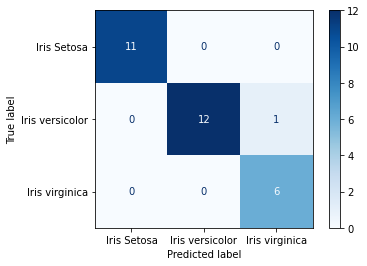

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix

disp = plot_confusion_matrix(model, X_test, Y_test,
                                 display_labels=['Iris Setosa', 'Iris versicolor', 'Iris virginica'],
                                 cmap=plt.cm.Blues,
                                 normalize=None)
print(disp)

# DISPLAYING THE TREE

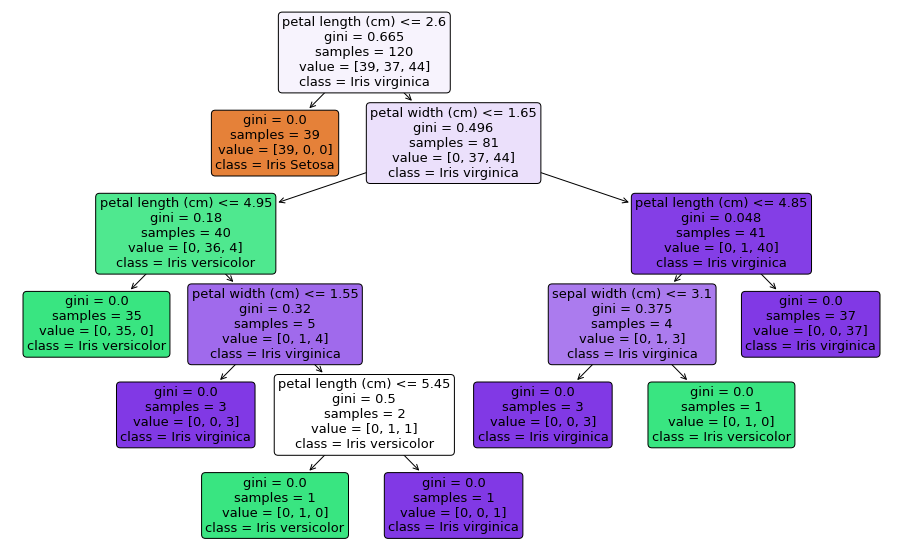

In [ ]:
from sklearn.tree import plot_tree
plt.figure(figsize = (16,10))
plot_tree(model,
          feature_names=['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)'],
          class_names=['Iris Setosa', 'Iris versicolor', 'Iris virginica'],
          filled = True, 
          rounded = True)
plt.savefig('iris_decision_tree.png')
plt.show()